In [6]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


200


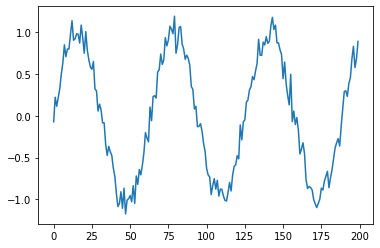

In [25]:
# make synthetic data
series = np.sin(0.1 * np.arange(200))

# optional add noise
series = series + np.random.randn(200)*0.1
print(len(series))

# plot
plt.plot(series)
plt.show();

In [26]:
# build the dataset
T = 10 
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10, 1)  Y.shape:  (190,)


In [42]:
# autoregressive Linear Model
_input = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(_input)
x = Dense(1)(x)
model = Model(_input, x)

# compile 
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1),
)

# trian
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2: ], Y[-N//2: ])
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 6ms/sample - loss: 15.1086 - val_loss: 0.2591
Epoch 2/80
95/95 [==============================] - 0s 167us/sample - loss: 0.1733 - val_loss: 0.1536
Epoch 3/80
95/95 [==============================] - 0s 170us/sample - loss: 0.1624 - val_loss: 0.2689
Epoch 4/80
95/95 [==============================] - 0s 174us/sample - loss: 0.1111 - val_loss: 0.0558
Epoch 5/80
95/95 [==============================] - 0s 166us/sample - loss: 0.1428 - val_loss: 0.0912
Epoch 6/80
95/95 [==============================] - 0s 166us/sample - loss: 0.1404 - val_loss: 0.0843
Epoch 7/80
95/95 [==============================] - 0s 166us/sample - loss: 0.1191 - val_loss: 0.0456
Epoch 8/80
95/95 [==============================] - 0s 175us/sample - loss: 0.0898 - val_loss: 0.1171
Epoch 9/80
95/95 [==============================] - 0s 179us/sample - loss: 0.0704 - val_loss: 0.0464
Epoch 10/80
95/95 [====================

95/95 [==============================] - 0s 197us/sample - loss: 0.0231 - val_loss: 0.0204


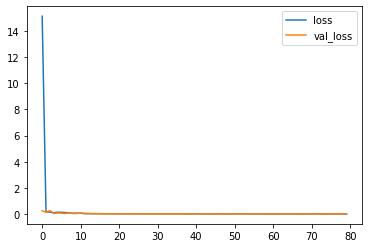

In [43]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

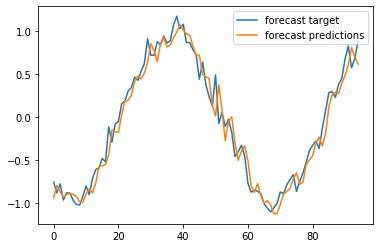

In [44]:
# WRONG forecasting using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
    i += 1
    validation_predictions.append(p)
    
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();

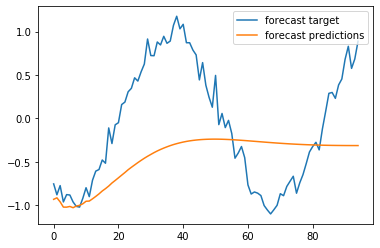

In [45]:
# CORRECT way of forecasting
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0] 
    
    # update
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
    
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();

### RNN Shapes 

In [46]:
"""
N = number of sampels
T = sequence of length
D = number of input features
M = number of hidden units
K = number of output units
"""

'\nN = number of sampels\nT = sequence of length\nD = number of input features\nM = number of hidden units\nK = number of output units\n'

In [47]:
# make some data
N = 1
T = 10
D = 3
M = None
K = 2
X = np.random.randn(N, T, D)


In [48]:
# make RNN
M = 5 
_input = Input(shape=(T, D))
x = SimpleRNN(M)(_input)
x = Dense(K)(x)

model = Model(_input, x)

In [50]:
# get the output
Yhat = model.predict(X)
print(Yhat)
print(Yhat.shape)

[[ 0.50069636 -0.6360667 ]]
(1, 2)


In [51]:
# See if we can replicate this output
# get the weights first
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 10, 3)]           0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 5)                 45        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [55]:
w = model.layers[1].get_weights()
print(len(w))
print(w)

3
[array([[-0.8346114 ,  0.6001354 , -0.5600666 , -0.4298375 , -0.19513977],
       [-0.02958643,  0.10080332, -0.24152946, -0.79204094,  0.5527777 ],
       [ 0.72268814, -0.26013112,  0.5096112 , -0.7383333 ,  0.1671657 ]],
      dtype=float32), array([[ 0.15176535,  0.48910785, -0.11826515, -0.564841  ,  0.6361673 ],
       [-0.12340208, -0.7047677 ,  0.04096457,  0.12147541,  0.68676054],
       [ 0.8460481 , -0.0170936 , -0.3569123 ,  0.38582805,  0.08752581],
       [-0.44690186,  0.44862717, -0.3070365 ,  0.651589  ,  0.2831482 ],
       [ 0.21498965,  0.2500348 ,  0.8733141 ,  0.3045768 ,  0.18925545]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]


In [56]:
# check the shapes of each np array
# First output is input > hidden
# Second output is hidden > hidden
# Third output is bias term (vector of length M)

a, b, c = model.layers[1].get_weights()
print(a.shape, b.shape, c.shape)

(3, 5) (5, 5) (5,)


In [57]:
Wx, Wh, bh = model.layers[1].get_weights()
Wo, bo = model.layers[2].get_weights()

In [58]:
# MANUAL RNN Calculation

# initial hidden state
h_last = np.zeros(M)

# the one and only sample
x = X[0]

# where we store the outputs
Yhats = []

for t in range(T):
    h = np.tanh(x[t].dot(Wx) + h_last.dot(Wh) + bh)
    # we only care about this value on the last iteration
    y = h.dot(Wo) + bo
    Yhats.append(y)
    
    # important: assign h to h_last
    h_last = h
print(Yhats[-1])

[ 0.50069625 -0.63606681]
